## _PandaML_
- Perform detailed _Exploratory Data Analysis_ (EDA) on STT Data.

In [1]:
import sys, os, glob, yaml

In [2]:
import math
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import trackml.dataset
import tensorflow as tf
import seaborn as sns

In [4]:
sys.path.append('src')

### _Dataset_

In [5]:
# mu- data (current)
path = './data_sets/pandaml/data_3.0_7.0_GeV/'

# mu+mu- data (coming)
# path = 'data_sets/pandaml/data_0.1_1.5_GeV/'

# pbarp data (coming)
# path = os.environ['HOME']+'/current/2_deepana/pandaml/data/'

In [6]:
# select an event
event_id = 1

In [9]:
# load event using trackml.dataset (update: pandaroot will now generate tubes.csv as cells.csv)
event_prefix = str('event{!s}'.format(format(event_id, '010d')))
prefix = path + str('event{!s}'.format(format(event_id, '010d')))
hits, tubes, particles, truth = trackml.dataset.load_event(prefix)

mem_bytes = (hits.memory_usage(index=True).sum() 
             + tubes.memory_usage(index=True).sum() 
             + particles.memory_usage(index=True).sum() 
             + truth.memory_usage(index=True).sum())

print('{} memory usage {:.2f} MB'.format(event_prefix, mem_bytes / 2**20))

event0000000001 memory usage 0.06 MB


In [10]:
hits.head()

,hit_id,x,y,z,tube_id,skewed,layer_id,sector_id,volume_id,isochrone,depcharge,energyloss,particle_id
0,1,-6.99749,-15.150000,35.0,47,0,0,2,9,0.285292,9281490.0,9.28149,10
1,2,-7.87217,-15.655000,35.0,153,0,1,2,9,0.293232,4585850.0,4.58585,10
2,3,-7.87217,-16.665001,35.0,266,0,2,2,9,0.187690,4601980.0,4.60198,10
3,4,-8.74686,-17.170000,35.0,384,0,3,2,9,0.403716,2983620.0,2.98362,10
4,5,-8.74686,-18.180000,35.0,509,0,4,2,9,0.038634,6841480.0,6.84148,10


In [11]:
tubes.head()

,hit_id,tube_id,skewed,layer_id,sector_id,volume_id,isochrone,depcharge,energyloss
0,1,47,0,0,2,9,0.285292,9281490.0,9.28149
1,2,153,0,1,2,9,0.293232,4585850.0,4.58585
2,3,266,0,2,2,9,0.187690,4601980.0,4.60198
3,4,384,0,3,2,9,0.403716,2983620.0,2.98362
4,5,509,0,4,2,9,0.038634,6841480.0,6.84148


In [12]:
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,pdg_code,start_time
0,10,0.0,0.0,0.0,-2.4937,-5.09868,1.15813,-1,13,0
1,10,0.0,0.0,0.0,-2.4937,-5.09868,1.15813,-1,13,0
2,10,0.0,0.0,0.0,-2.4937,-5.09868,1.15813,-1,13,0
3,10,0.0,0.0,0.0,-2.4937,-5.09868,1.15813,-1,13,0
4,10,0.0,0.0,0.0,-2.4937,-5.09868,1.15813,-1,13,0


In [13]:
truth.head()

,hit_id,tx,ty,tz,tpx,tpy,tpz,particle_id
0,1,-7.26717,-15.020900,3.40581,-2.44911,-5.11698,1.15865,10
1,2,-7.62655,-15.772400,3.57594,-2.44676,-5.11812,1.15850,10
2,3,-8.01931,-16.594700,3.76204,-2.44454,-5.11916,1.15845,10
3,4,-8.37782,-17.346001,3.93202,-2.44204,-5.12033,1.15849,10
4,5,-8.76997,-18.169001,4.11822,-2.43937,-5.12152,1.15863,10


### _Draw Event_

In [14]:
from src.drawing import draw_single_event

In [15]:
def display_event(path="", event_id=1):
    prefix = path + str('event{!s}'.format(format(event_id, '010d')))
    hits = trackml.dataset.load_event_hits(prefix)
    draw_single_event(hits, event_id, "event", (10, 10), False)

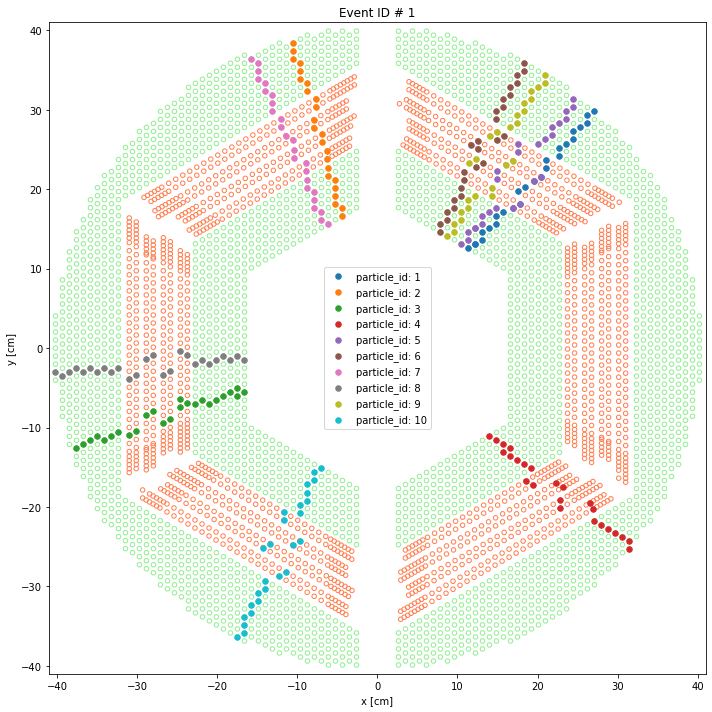

In [16]:
display_event(path, 1)

### _Draw Tracks_

In [17]:
# Add polar coordinates: r, phi
# hits['r'] = hits.apply(lambda row: np.sqrt(row.x**2 + row.y**2), axis=1)
hits = hits.assign(r=hits.apply(lambda row: np.sqrt(row.x**2 + row.y**2), axis=1))

In [19]:
# lets now sort hits according to r
hits = hits.sort_values(by=['r']).reset_index(drop=True)

In [20]:
hits.head()

,hit_id,x,y,z,tube_id,skewed,layer_id,sector_id,volume_id,isochrone,depcharge,energyloss,particle_id,r
0,104,7.872170,14.645,35.0,98,0,0,5,9,0.083559,14705300.0,14.70530,6,16.626698
1,27,8.746860,14.140,35.0,97,0,0,5,9,0.029734,8615740.0,8.61574,9,16.626700
2,53,-16.618999,-1.515,35.0,28,0,0,1,9,0.307900,6303480.0,6.30348,8,16.687911
3,1,-6.997490,-15.150,35.0,47,0,0,2,9,0.285292,9281490.0,9.28149,10,16.687940
4,131,10.496200,13.130,35.0,95,0,0,5,9,0.123073,5570750.0,5.57075,5,16.809733


In [21]:
# lets get unique pids with freq (~ hits).
sel_pids, sel_pids_fr = np.unique(hits.particle_id, return_counts=True)

In [22]:
print(sel_pids)

[ 1  2  3  4  5  6  7  8  9 10]


In [31]:
# select data of a particle
data = hits[hits['particle_id'] == 5]

(10.0, 40.0)

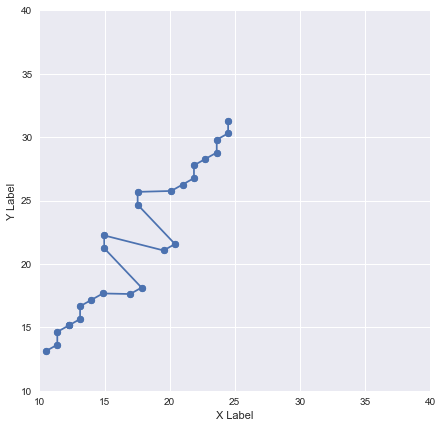

In [46]:
# Using Object Oriented API
plt.close('all')
plt.style.use('seaborn')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
plt.scatter(data.x, data.y)
plt.plot(data.x, data.y, "-o")
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_xlim(10, 40)
ax.set_ylim(10, 40)
# plt.savefig(os.path.join(outdir, "event.png"))

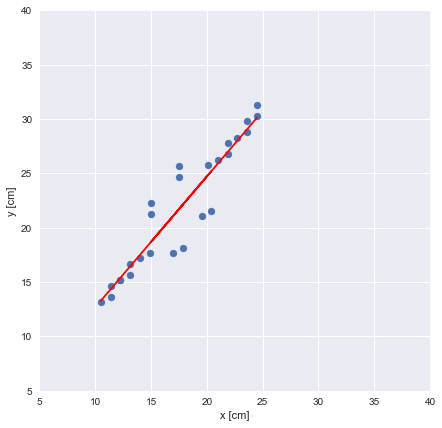

In [47]:
# numpy.polyfit() function
plt.close('all')
plt.style.use('seaborn')
fig = plt.figure(figsize=(7,7))

a, b = np.polyfit(data.x, data.y, 1)

plt.scatter(data.x, data.y)
plt.plot(data.x, a*data.x+b, 'r')
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.xlim((5, 40))
plt.ylim((5, 40))
plt.show()

### _Exploratory Data Analysis (EDA)_

In [ ]:
# first drop skewed straws. later z-axis
# hits.query('skewed==0').head()

In [ ]:
plt.style.use('ggplot')

In [ ]:
truth_s = truth[['tx','ty','tz','tpx','tpy','tpz']]
_ = truth_s.hist(figsize = (8,8))

In [ ]:
particles_s = particles[['px','py','pz']]
_ = particles_s.hist(figsize = (8,8))

In [ ]:
# Pandas: Histogram
hits_s = hits[['x', 'y', 'z']]
_ = hits_s.hist(color='b', alpha=0.5, bins=50, figsize=(10,10))

In [ ]:
# Pandas: Box Plot
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}
hits_s.plot.box(color=color, sym='r+', figsize=(10,10))

In [ ]:
# Pandas: Scatter Plot
hits_s.plot.scatter(x='x', y='y');

In [ ]:
# Pandas: Histogram Stacked
hits_s.plot.hist(stacked=True, bins=20, figsize=(10,10))

In [ ]:
# Pandas: Scatter Matrix:
_ = pd.plotting.scatter_matrix(hits_s,figsize=(12, 12), diagonal='kde')

In [ ]:
# Seaborn: Pair Plot
_ = sns.pairplot(hits_s)

In [ ]:
# Seaborn: Pair Plot
sns.jointplot(data=hits, x="x", y="y", alpha=0.5, height=8);

In [ ]:
# Seaborn: Heatmap
plt.figure(figsize=(10,10))
_ = sns.heatmap(hits_s.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [ ]:
# Number of unique particles
# len(truth.particle_id.unique())

In [ ]:
# Filter hits with a particle_id
# hits[hits.particle_id == 13]

In [ ]:
# Get every 3rd particle
tracks = truth.particle_id.unique()[1::2]

plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

for track in tracks:
    t = truth[truth.particle_id == track]
    ax.plot3D(t.tz, t.tx, t.ty)

    ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')

# These two added to widen the 3D space
ax.scatter(100,100,100, s=0)
ax.scatter(-100,-100,-100, s=0)

plt.show()